In [1]:
#importowanie bibliotek
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.metrics import confusion_matrix
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import StandardScaler, FunctionTransformer, LabelEncoder
from nltk.stem.porter import PorterStemmer
import nltk
from nltk.corpus import stopwords
import re
import string
from sklearn.tree import DecisionTreeClassifier
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
import xgboost as xgb
from langdetect import detect

import warnings
#warnings.filterwarnings('ignore')


In [2]:
df = pd.read_csv("PreProcessedData.csv")

In [3]:
#df = df.sample(frac=0.5) #zeby szybciej sie uczylo, potem wezmiemy calosc

In [4]:
df.head()

,Unnamed: 0,title,text,Ground Label
0,0,Ann Coulter Make Believes She Has ‘Gay Friend...,"It s hard to believe, but Donald Trump does ha...",fake
1,1,Rating: Moody‘s verbessert Ausblick für Russla...,bankensektor Der russische Staat werde die Ban...,fake
2,2,CAN WE ADD DIRTY MONEY ‘LAUNDERING’ To The Oba...,A member of the House Intelligence Committee i...,fake
3,3,Republicans on Obamacare repeal: 'We're going ...,WASHINGTON (Reuters) - House of Representative...,true
4,4,"Trump, on possible DACA deal, says border wall...",WASHINGTON (Reuters) - U.S. President Donald T...,true


In [5]:
df.rename(columns = {'Ground Label': 'label'},inplace=True)

In [6]:
#usunm ta jedna kolumne bo jest useless
df.drop(df.columns[0], inplace=True, axis=1)

In [7]:
df.head()

,title,text,label
0,Ann Coulter Make Believes She Has ‘Gay Friend...,"It s hard to believe, but Donald Trump does ha...",fake
1,Rating: Moody‘s verbessert Ausblick für Russla...,bankensektor Der russische Staat werde die Ban...,fake
2,CAN WE ADD DIRTY MONEY ‘LAUNDERING’ To The Oba...,A member of the House Intelligence Committee i...,fake
3,Republicans on Obamacare repeal: 'We're going ...,WASHINGTON (Reuters) - House of Representative...,true
4,"Trump, on possible DACA deal, says border wall...",WASHINGTON (Reuters) - U.S. President Donald T...,true


In [8]:
#splitting the data
x_train, x_val, y_train, y_val = train_test_split(df[['title','text']], df['label'], test_size=0.3, random_state=10)

In [9]:
df=pd.concat([x_train, y_train], axis=1, join='inner')

In [10]:
df.head()

,title,text,label
41223,"Short on boots and backing, West Africa force ...","SEVARE, Mali (Reuters) - Snipers from a new We...",true
32850,Half of Germans want new elections after coali...,BERLIN (Reuters) - Half of Germans are in favo...,true
3816,"Research Suggests Gun Background Checks Work, ...","Research Suggests Gun Background Checks Work, ...",true
48938,Iraqi PM Abadi says Kurdish independence refer...,BAGHDAD (Reuters) - Iraqi Prime Minister Haide...,true
35936,Vietnam calls on Cambodia to protect immigrants,HANOI (Reuters) - Vietnam called on Cambodia o...,true


In [11]:
df.loc[df.duplicated()]

,title,text,label
40188,Globalist Plan for Human Control,Veteran IT Training Program Leads to 100% Job ...,fake
59762,8 classic football banners of our time,Next Swipe left/right 8 classic football banne...,fake
24768,EVERY BAD THING We Can Say Goodbye To With Our...,The word nothing-burger has been tossed arou...,fake
32685,WHEN A GOVERNMENT PUTS IMMIGRANTS BEFORE CITIZ...,Barack Obama and the Democrat party would like...,fake
33435,GREAT! TRUMP ADVISOR Hits Back At Sen. Liz War...,,fake
...,...,...,...
7290,Russia to respond to Twitter ban on Russian me...,MOSCOW (Reuters) - Russia said on Thursday it ...,true
49391,"Smart Cities, Androids, Technocracy, Kevin Spa...",Tune in to the Alternate Current Radio Network...,fake
53604,Obama Talks About HIMSELF 207 Times In Speeche...,Go to Article \r\nPresident Barack Obama has b...,fake
47475,Boiler Room #106 – Did Israel Attack Damascus?...,Tune in to the Alternate Current Radio Network...,fake


In [12]:
df.loc[ df['title'].str.contains('Goes Down, Loretta', na=False)  ]

,title,text,label
50192,"Comment on If Clinton Goes Down, Loretta Lynch...","Posted on October 31, 2016 by Daisy Luther \r\...",fake
63556,"If Clinton Goes Down, Loretta Lynch Will Go Do...","\r\nOh, Loretta.\r\nI’ll bet that AG Loretta L...",fake
17904,"Comment on If Clinton Goes Down, Loretta Lynch...","Posted on October 31, 2016 by Daisy Luther \r\...",fake


Mamy 4600 duplikatów spośród 48 000 wierszy. Warto by było usunąć te duplikaty w zbiorze treningowym, bo nic nie wnoszą sensownego

In [13]:
df.drop_duplicates(inplace = True)

In [14]:
df.loc[df.duplicated()]

,title,text,label


# 1. Analiza całokształtu zadania - CEL

Cel projektu : mamy title newsa, text i ground label czyli informacje czy to jest fake czy nie -> 
Musimy stworzyc model klasyfikacji ktory bedzie stwierdzać, czy dany artykuł jest prawdziwy czy nie.

# 2. Wizualizacja danych

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 43572 entries, 41223 to 50496
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   title   43129 non-null  object
 1   text    43525 non-null  object
 2   label   43572 non-null  object
dtypes: object(3)
memory usage: 1.3+ MB


In [16]:
df.shape

(43572, 3)

In [17]:
df['label'].value_counts()

fake    24961
true    18611
Name: label, dtype: int64

C:\Users\Krzysztof\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


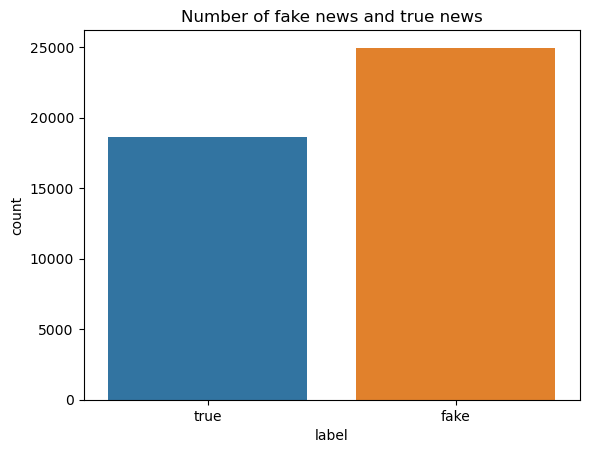

In [18]:
sns.countplot(df['label'])
plt.title('Number of fake news and true news')
plt.show()

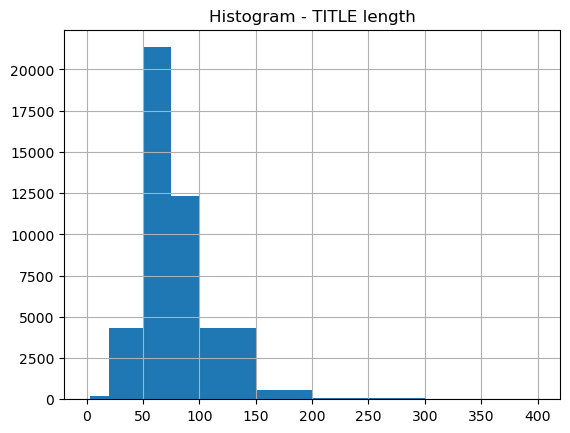

In [19]:
df['title'].str.len().hist(bins=[0,3,20,50,75,100,150,200,300,400])
plt.title('Histogram - TITLE length')
plt.show()

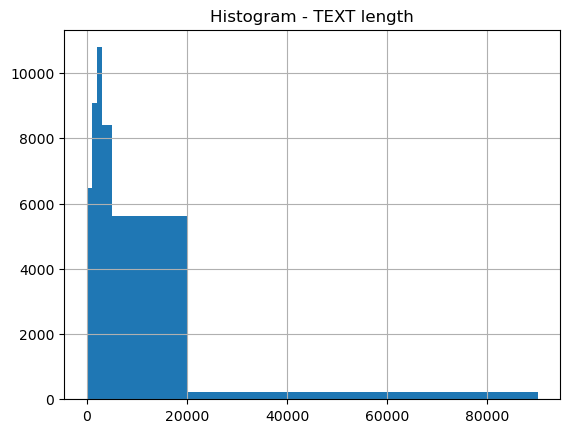

In [20]:
df['text'].str.len().hist(bins=[0,50,200,300,1000,2000,3000,5000,20000,90000])
plt.title('Histogram - TEXT length')
plt.show()

In [21]:
df.isna().sum() #tytuł będziemy doklejać do tekstu

title    443
text      47
label      0
dtype: int64

C:\Users\Krzysztof\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Krzysztof\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


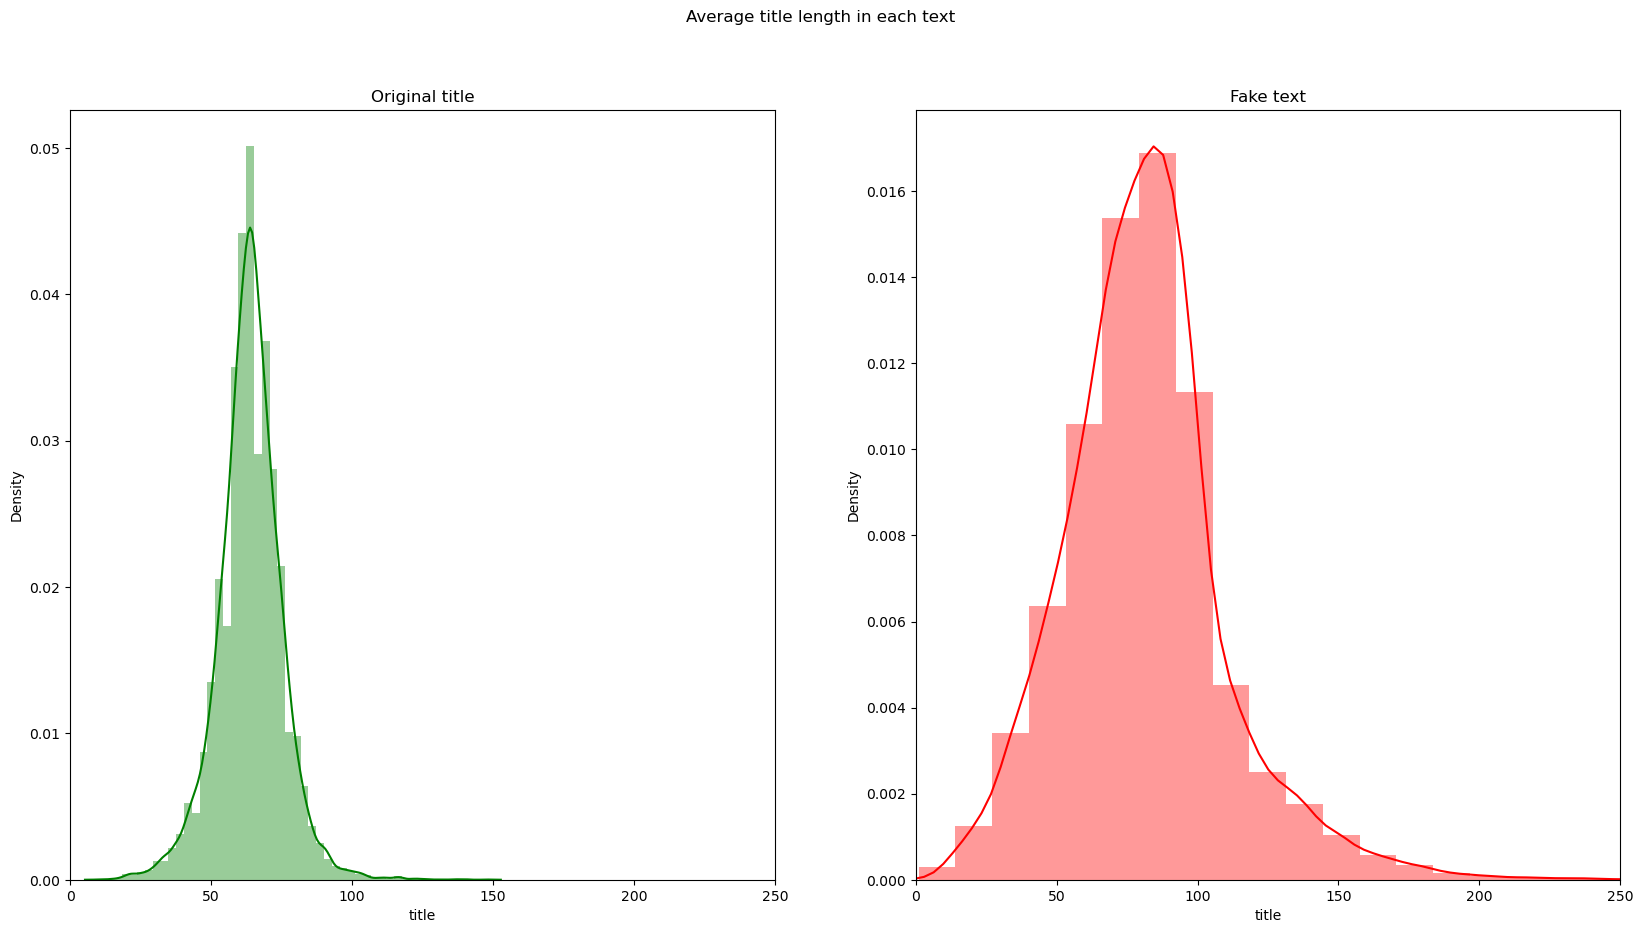

In [22]:
#average title length in each text
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(20,10))

len_word_true=df[df['label']=='true']['title'].str.len()
sns.distplot(len_word_true.map(lambda x: np.mean(x)),ax=ax1,color='green')
ax1.set_xlim([0,250])
ax1.set_title('Original title')

len_word_false=df[df['label']=='fake']['title'].str.len()
sns.distplot(len_word_false.map(lambda x: np.mean(x)),ax=ax2,color='red')
ax2.set_xlim([0,250])
ax2.set_title('Fake text')

fig.suptitle('Average title length in each text')

plt.show()

C:\Users\Krzysztof\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Krzysztof\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


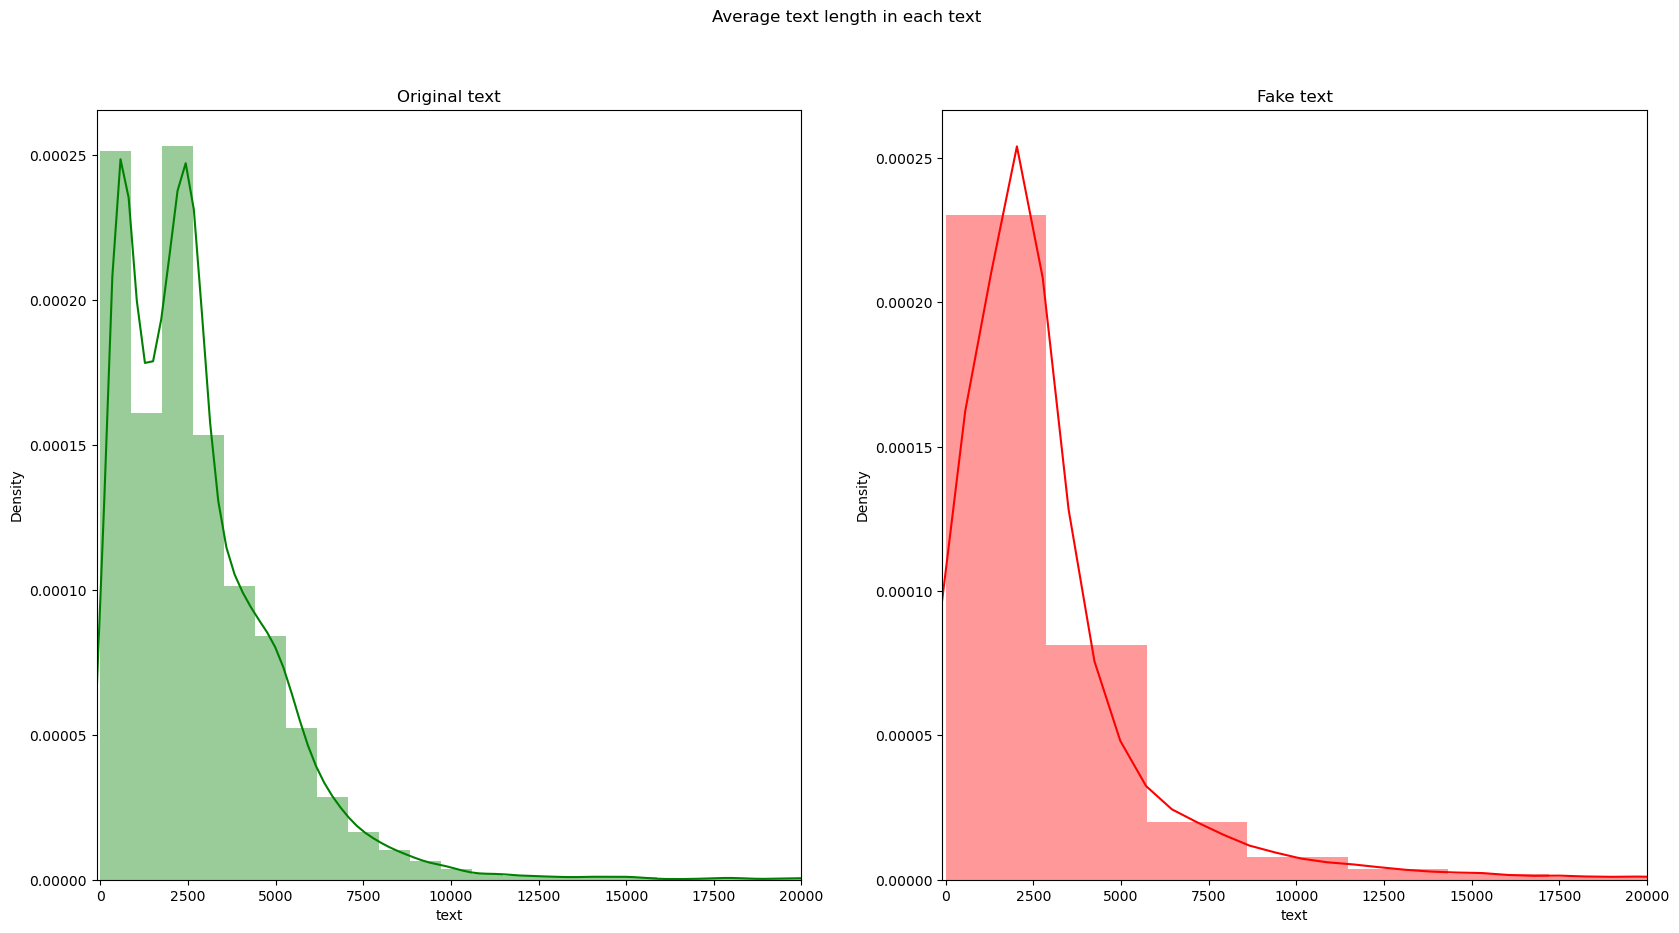

In [23]:
#average word length in each text
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(20,10))
len_word_true=df[df['label']=='true']['text'].str.len()
sns.distplot(len_word_true.map(lambda x: np.mean(x)),ax=ax1,color='green')
ax1.set_title('Original text')
ax1.set_xlim([-100,20000])

len_word_false=df[df['label']=='fake']['text'].str.len()
sns.distplot(len_word_false.map(lambda x: np.mean(x)),ax=ax2,color='red')
ax2.set_title('Fake text')

fig.suptitle('Average text length in each text')
ax2.set_xlim([-100,20000])
plt.show()

In [24]:
df.loc[df['text'].isna()]

,title,text,label
44588,"Ron Paul on Trump, Anarchism & the AltRight",NaN,fake
20689,"10/3 Expo Park-Forbes Field Era: Pirates, Gray...",NaN,fake
61261,110% des Américains assurent qu’ils continuero...,NaN,fake
22446,Donald Trump en 5 dates >> Le Gorafi,NaN,fake
42041,Elle met en fuite un braqueur en lui jetant de...,NaN,fake
49201,10/4 TRS-PNC Park Era: Reds Thump Buc 3x in Pl...,NaN,fake
8403,Débat Primaire de la Droite : les Français pas...,NaN,fake
27463,10/5 Expo Park-Forbes Field: Bucs Win '60 Open...,NaN,fake
43742,Here's the Democracy Alliance's 'Resistance Map',NaN,true
68433,Vladimir Poutine est élu 45e Président des Eta...,NaN,fake


In [25]:
df.loc[df['title'].isna()]

,title,text,label
3639,NaN,Makes sense… You do the same with any other co...,fake
53532,NaN,".. ""SEC in recent months has raised concern t...",fake
2744,NaN,Would have been more ironic if that had been a...,fake
46671,NaN,Trump has an excuse now to audit any vote with...,fake
33527,NaN,ah...it's Aloha Snack Bar...,fake
...,...,...,...
31756,NaN,I think we must get away from this…its not good…,fake
10500,NaN,David Brock went from a Right Wing CS to a Lef...,fake
6897,NaN,The New World Order elite want to steal Russia...,fake
58718,NaN,So privatization is really moving the CIA into...,fake


In [26]:
df.loc[ ( df['title'].isna() ) &  ( df['text'].isna() )]

,title,text,label


In [27]:
df.loc[( df['text'].str.len() < 30 )  & (df['title'].str.len()<30)]

,title,text,label
31705,Trump’s Closing Argument,,fake
32178,Calexit Yes,David Swanson,fake
52235,Huma Abedin’s Muslim Dad,,fake
29457,World War 3?,,fake
13184,Hillary’s Watergate?,,fake
25468,Huma’s Weiner Dogs Hillary,,fake
39760,"RIP, Vine",Trending,fake
26483,LIVE FEED: INAUGURATION 2017!,,fake


# 3. Preprocessing

# 3.0 SPLITTING DATA

In [28]:
#splitting the data
x_train, x_test, y_train, y_test = train_test_split(df[['title','text']], df['label'], test_size=0.3, random_state=10) 
# a co zeby zrobic warstwowe probkowanie i zachowac stosunek?

In [29]:
x_train.head()

,title,text
6887,WATCH: New ‘Birdie’ Sanders Ad Celebrates RES...,"Bernie Sanders is on fire, especially after th..."
42454,German FinMin Schaeuble ready to head parliame...,BERLIN (Reuters) - Germany s pro-austerity Fin...
29714,Daily Show: Obama Has ‘No More F*cks To Give’...,"Trevor Noah, host of Comedy Central s The Dail..."
20197,Who burned the cakes? Belgian waffle fire chok...,BRUSSELS (Reuters) - The sweet smell of waffle...
34310,ILLEGAL ALIENS DEMAND NEW BILL OF RIGHTS: To I...,Sounds great how about a new car?An immigrant-...


In [30]:
y_train.head()

6887     fake
42454    true
29714    fake
20197    true
34310    fake
Name: label, dtype: object

# 3.1 Preprocessing and Text Mining 

# TODO: Usuńmy wiersze z innymi językam

In [31]:
stopwor = stopwords.words('English')

In [32]:
def preprocess_text(text):
    
    #lowercase text
    text = str(text) 
    text = text.lower()
    
    #Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))
    
    #Remove stop words - English
    text = ' '.join(word for word in text.split() if word not in stopwor)
    
    #Get rid of url
    text = re.sub(r'https?://\S+', '', text)
    
    return text

In [33]:
def transform(x, y):
    x['text']=x['title']+' '+x['text']
    x=x['text']
    x=x.apply(preprocess_text)
    df_helper=pd.concat([x, y], axis=1)
    df_helper = df_helper[df_helper['text'].notna()]
    df_helper = df_helper.drop(df_helper[df_helper['text'].apply(detect)!='en'].index)
    y_train=df_helper['label']
    x_train=df_helper['text']
    return x_train, y_train

In [34]:
x_train, y_train = transform(x_train, y_train)
x_test, y_test = transform(x_test, y_test)

In [35]:
'''
class MyTransformer(BaseEstimator, TransformerMixin):
    def __init__(self):
        pass

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        X_copy = X.copy() 
        X_copy['text'] = X_copy['title'] + ' ' + X_copy['text'] 
        X_copy.drop(X_copy.columns[0], axis=1, inplace=True)  
        X_copy['text'] = X_copy['text'].apply(preprocess_text)
        return X_copy
'''

"\nclass MyTransformer(BaseEstimator, TransformerMixin):\n    def __init__(self):\n        pass\n\n    def fit(self, X, y=None):\n        return self\n\n    def transform(self, X):\n        X_copy = X.copy() \n        X_copy['text'] = X_copy['title'] + ' ' + X_copy['text'] \n        X_copy.drop(X_copy.columns[0], axis=1, inplace=True)  \n        X_copy['text'] = X_copy['text'].apply(preprocess_text)\n        return X_copy\n"

In [36]:
pipeline = Pipeline([
    ('tfidf', TfidfVectorizer())
])

In [37]:
pipeline.fit(x_train)

Pipeline(steps=[('tfidf', TfidfVectorizer())])

In [38]:
x_train_transformed = pipeline.transform(x_train)
x_test_transformed = pipeline.transform(x_test)

In [39]:
print(f'Shape of x_train_transformed: {x_train_transformed.shape}')
print(f'Shape of x_test_transformed: {x_test_transformed.shape}')

Shape of x_train_transformed: (29807, 207362)
Shape of x_test_transformed: (12786, 207362)


In [40]:
label_encoder = LabelEncoder().fit(y_train)

In [41]:
y_train_transformed = label_encoder.transform(y_train)
y_test_transformed = label_encoder.transform(y_test)

In [42]:
print(f'Shape of y_train_transformed: {y_train_transformed.shape}')
print(f'Shape of y_test_transformed: {y_test_transformed.shape}')

Shape of y_train_transformed: (29807,)
Shape of y_test_transformed: (12786,)


In [43]:
# STEMMING - Sprawia ze slowa sa w bazowej formie -> dlugo trwa

#SnowballStemmer(language='english')
#stemmer = PorterStemmer()
#Stem words
#words = text.split()
#stemmed_words = [stemmer.stem(word) for word in words]
#text = ' '.join(stemmed_words)

# 3.2 PCA - Redukcja wymiarów

In [44]:
from sklearn.decomposition import TruncatedSVD

In [45]:
pca=TruncatedSVD(n_components=1000)

In [46]:
pca_x_train=pca.fit_transform(x_train_transformed)

In [47]:
pca_x_test=pca.transform(x_test_transformed)

# 4. Uczenie modelu

# 4.1 DecisionTree

In [48]:
x_train_transformed.shape

(29807, 207362)

In [49]:
y_train_transformed.shape

(29807,)

In [50]:
y_test_transformed.shape

(12786,)

In [51]:
x_test_transformed.shape

(12786, 207362)

In [52]:
DT = DecisionTreeClassifier()
DT.fit(x_train_transformed, y_train_transformed)

DecisionTreeClassifier()

In [53]:
DT.score(x_train_transformed, y_train_transformed)

0.9998993525010903

In [54]:
DT.score(x_test_transformed, y_test_transformed)

0.9318004066948224

In [55]:
#XD
y_pred = DT.predict(x_test_transformed)
confusion_mat = confusion_matrix(y_test_transformed, y_pred)

In [56]:
print(confusion_mat)

[[6805  403]
 [ 469 5109]]


# 4.2 Testowanie opłacalności algorytmu PCA

## 4.2.1 DecisionTree po PCA

In [57]:
DT2=DecisionTreeClassifier()
DT2.fit(pca_x_train, y_train_transformed)

DecisionTreeClassifier()

In [58]:
print(f'Score dla treningowego dla DecisionTree po PCA: {DT2.score(pca_x_train,y_train_transformed)}')
print(f'Score dla testowego dla DecisionTree po PCA: {DT2.score(pca_x_test,y_test_transformed)}')

DT2.score(pca_x_test,y_test_transformed)

Score dla treningowego dla DecisionTree po PCA: 0.9998993525010903
Score dla testowego dla DecisionTree po PCA: 0.8377131237290787


0.8377131237290787

## 4.2.2 RandomForest po PCA

In [59]:
RF2 = RandomForestClassifier()
RF2.fit(pca_x_train, y_train_transformed)

RandomForestClassifier()

In [60]:
print(f'Score dla treningowego dla RandomForest po PCA: {RF2.score(pca_x_train,y_train_transformed)}')
print(f'Score dla testowego dla RandomForest po PCA: {RF2.score(pca_x_test,y_test_transformed)}')

Score dla treningowego dla RandomForest po PCA: 0.9998658033347871
Score dla testowego dla RandomForest po PCA: 0.9015329266385109


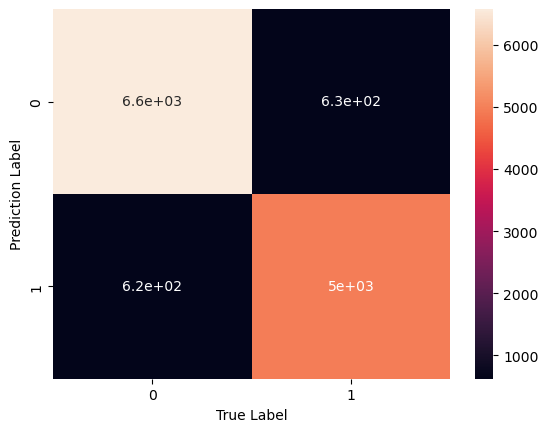

In [61]:
y_pred = RF2.predict(pca_x_test)
confusion_mat = confusion_matrix(y_test_transformed, y_pred)
ax = sns.heatmap(confusion_mat, annot=True)
ax.set(xlabel='True Label', ylabel='Prediction Label')
plt.show()

# 4.3 RandomForest

In [62]:
rf = RandomForestClassifier()
rf.fit(x_train_transformed, y_train_transformed)

RandomForestClassifier()

In [63]:
print(f'Score dla treningowego dla RandomForest: {rf.score(x_train_transformed,y_train_transformed)}')
print(f'Score dla testowego dla RandomForest: {rf.score(x_test_transformed,y_test_transformed)}')

Score dla treningowego dla RandomForest: 0.9998993525010903
Score dla testowego dla RandomForest: 0.9292194587830439


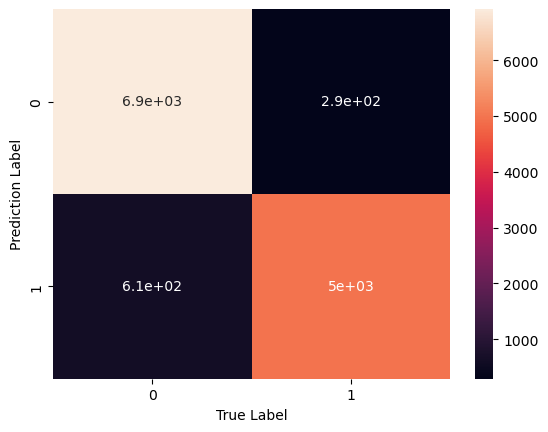

In [64]:
y_pred = rf.predict(x_test_transformed)
confusion_mat = confusion_matrix(y_test_transformed, y_pred)
ax = sns.heatmap(confusion_mat, annot=True)
ax.set(xlabel='True Label', ylabel='Prediction Label')
plt.show()

In [65]:
print(classification_report(y_pred,y_test_transformed))

              precision    recall  f1-score   support

           0       0.96      0.92      0.94      7525
           1       0.89      0.94      0.92      5261

    accuracy                           0.93     12786
   macro avg       0.92      0.93      0.93     12786
weighted avg       0.93      0.93      0.93     12786



# 4.4 XGboost

In [66]:
xgb_classifier = xgb.XGBClassifier()
xgb_classifier.fit(x_train_transformed,y_train_transformed)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [67]:
print(f'Score dla treningowego dla XGboost: {xgb_classifier.score(x_train_transformed,y_train_transformed)}')
print(f'Score dla testowego dla XGboost: {xgb_classifier.score(x_test_transformed,y_test_transformed)}')

Score dla treningowego dla XGboost: 0.9924178884154728
Score dla testowego dla XGboost: 0.9616768340372283


In [68]:
print(classification_report(y_pred,y_test_transformed))

              precision    recall  f1-score   support

           0       0.96      0.92      0.94      7525
           1       0.89      0.94      0.92      5261

    accuracy                           0.93     12786
   macro avg       0.92      0.93      0.93     12786
weighted avg       0.93      0.93      0.93     12786



# 5. Strojenie hiperparametrów